In [39]:
import pandas as pd
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset.xlsx",
sheet_name="dataset")
data

,age,income,height,weight,score,gender,target_class
0,53.314588,46154.444558,163.419921,76.123791,63,Female,Healthy
1,17.966176,60062.928092,160.731189,44.461246,79,Male,Healthy
2,34.444523,44231.081305,154.878956,85.437335,99,Male,Healthy
3,38.840654,58356.921121,148.451433,77.088962,53,Male,Unhealthy
4,34.673053,38702.931453,173.231706,73.840446,67,Female,Unhealthy
...,...,...,...,...,...,...,...
95,34.339202,150000.000000,168.475817,62.157100,67,Female,Healthy
96,22.889838,180000.000000,159.602403,63.697198,55,NaN,Unhealthy
97,28.481639,200000.000000,157.216953,65.773231,86,Female,Healthy
98,35.473987,250000.000000,166.958453,150.000000,97,Male,Healthy


In [40]:
# View a concise summary of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           95 non-null     float64
 1   income        97 non-null     float64
 2   height        98 non-null     float64
 3   weight        98 non-null     float64
 4   score         100 non-null    int64  
 5   gender        95 non-null     object 
 6   target_class  100 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.6+ KB


In [41]:
# View the summary statistics of the numeric columns in the dataset
data.describe()

,age,income,height,weight,score
count,95.000000,97.000000,98.000000,98.000000,100.000000
mean,33.702332,59733.807283,163.793065,73.594387,73.680000
std,9.730129,39816.965650,10.086378,19.716504,15.405548
min,11.980788,25283.554999,138.031134,42.386887,50.000000
25%,26.391512,45406.391005,157.892797,61.711524,59.750000
50%,33.876720,52544.208433,163.488158,72.247831,73.500000
75%,40.214783,58696.059201,170.671696,83.135555,86.250000
max,65.788808,300000.000000,190.733598,180.000000,99.000000


In [42]:
# View the distribution of values in a categorical column
data['gender'].value_counts()

Male      50
Female    45
Name: gender, dtype: int64

In [43]:
# Count unique values in a categorical column
data['gender'].nunique()

2

In [44]:
# Identify all categorical columns in the dataset 
categorical_columns = data.select_dtypes(include=['object',
'category']).columns

In [45]:
# View the categorical columns
print("Categorical columns:")
print(categorical_columns)


Categorical columns:
Index(['gender', 'target_class'], dtype='object')


In [46]:
# Count unique values in each categorical column
for col in categorical_columns:
 print(f"\nColumn: {col}")
 print(data[col].value_counts())


Column: gender
Male      50
Female    45
Name: gender, dtype: int64

Column: target_class
Unhealthy    56
Healthy      44
Name: target_class, dtype: int64


In [47]:
# Count missing values in each column
data.isnull().sum()

age             5
income          3
height          2
weight          2
score           0
gender          5
target_class    0
dtype: int64

In [48]:
# Replace missing values in the 'age' column with the mean of the column
data['age'] = data['age'].fillna(data['age'].mean())

In [49]:
# Replace missing values in the 'income' column with the mean of the column
data['income'] = data['income'].fillna(data['income'].mean())

In [50]:
# Replace missing values in the 'gender' column with the mode (most frequent value)
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])

In [51]:
# Replace missing values in the 'weight' column with a specific value, e.g., 70 data['weight'] =
data['weight'].fillna(70)


0      76.123791
1      44.461246
2      85.437335
3      77.088962
4      73.840446
         ...    
95     62.157100
96     63.697198
97     65.773231
98    150.000000
99    180.000000
Name: weight, Length: 100, dtype: float64

In [52]:
# Replace missing values in multiple columns
data.fillna({
 'age': data['age'].mean(),
 'income': data['income'].mean(),
 'gender': data['gender'].mode()[0]
}, inplace=True)

In [53]:
# Replace missing values in 'age' by mean within each
'target_class'
data['age'] = data.groupby('target_class')['age'].transform(lambda x:
x.fillna(x.mean()))

In [54]:
# Similarly for 'income'
data['income'] = data.groupby('target_class')['income'].transform(lambda x:
x.fillna(x.mean()))

In [55]:
data.isnull().sum()

age             0
income          0
height          2
weight          2
score           0
gender          0
target_class    0
dtype: int64

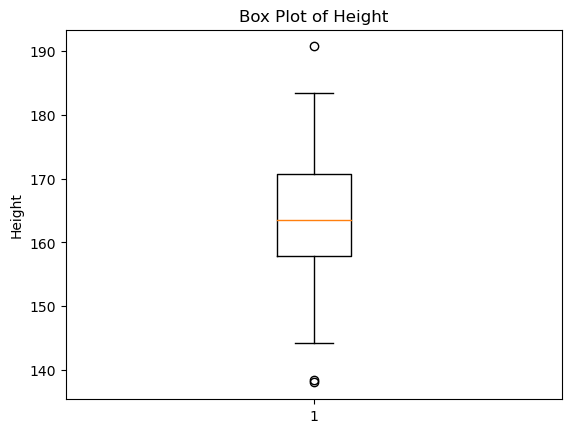

In [56]:
import matplotlib.pyplot as plt
# Create a box plot for a specific column (e.g.,'income')
plt.boxplot(data['height'].dropna()) # Drop missing values to avoid issues
plt.title('Box Plot of Height')
plt.ylabel('Height')
plt.show()


Median Line: {'x': array([0.925, 1.075]), 'y': array([163.48815845, 163.48815845])}
Whisker Lines: [{'x': array([1, 1]), 'y': array([157.8927974 , 144.18070592])}, {'x': array([1, 1]), 'y': array([170.67169584, 183.48956095])}]
Box Size: {'x': array([0.925, 1.075, 1.075, 0.925, 0.925]), 'y': array([157.8927974 , 157.8927974 , 170.67169584, 170.67169584,
       157.8927974 ])}


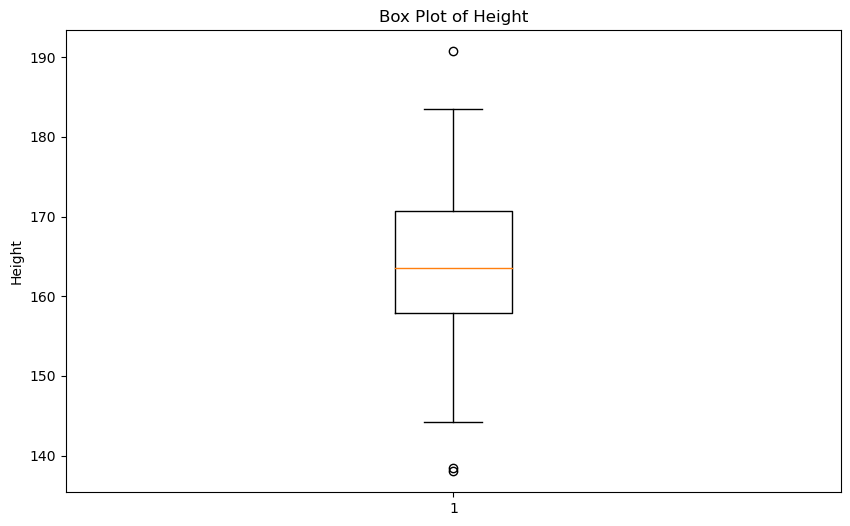

In [57]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'height' is the column you're analyzing
plt.figure(figsize=(10, 6))  # Adjust the size of the boxplot (optional)

# Create the box plot
boxplot = plt.boxplot(data['height'].dropna())  # Drop missing values to avoid issues

# Set title and labels
plt.title('Box Plot of Height')
plt.ylabel('Height')

# Extract and print the median line, whiskers, and box dimensions
# Median
median = boxplot['medians'][0]
median_x = median.get_xdata()
median_y = median.get_ydata()
median_line = {'x': median_x, 'y': median_y}
print(f"Median Line: {median_line}")

# Whiskers
whiskers = boxplot['whiskers']
whisker_lines = []
for whisker in whiskers:
    whisker_lines.append({'x': whisker.get_xdata(), 'y': whisker.get_ydata()})
print(f"Whisker Lines: {whisker_lines}")

# Box size (Q1, Q3 boundaries)
boxes = boxplot['boxes'][0]
box_x = boxes.get_xdata()
box_y = boxes.get_ydata()
box_size = {'x': box_x, 'y': box_y}
print(f"Box Size: {box_size}")

# Show the plot
plt.show()


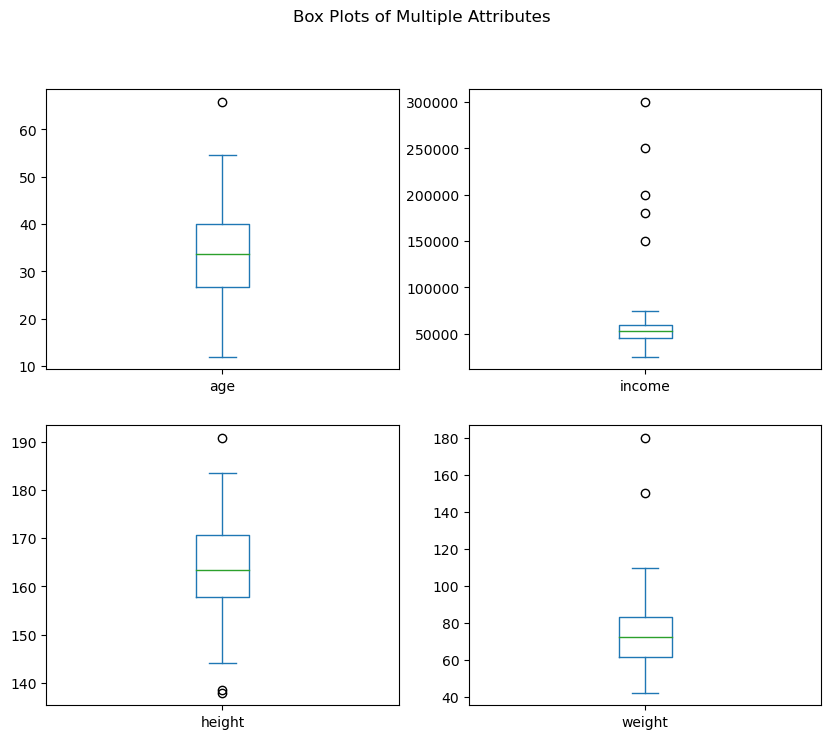

In [58]:
# Create box plots for multiple numerical columns using matplotlib
data[['age', 'income', 'height', 'weight']].plot(kind='box',
subplots=True, layout=(2, 2), figsize=(10, 8))
plt.suptitle('Box Plots of Multiple Attributes')
plt.show()

In [59]:
data ['age'] = data ['age'].fillna(data['age'].mean())

In [60]:
data.to_excel("processed_data2.xlsx", index=False)

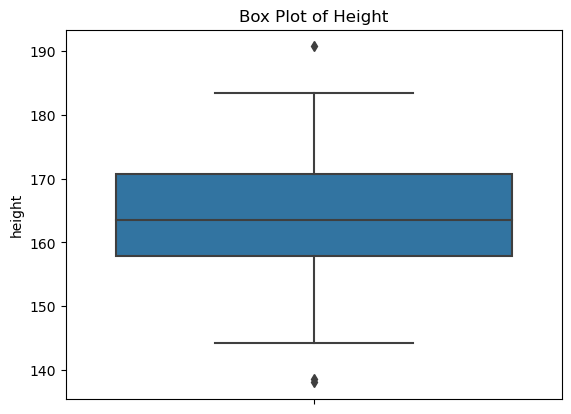

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a vertical box plot for 'height'
sns.boxplot(y=data['height'])
plt.title('Box Plot of Height')
plt.show()

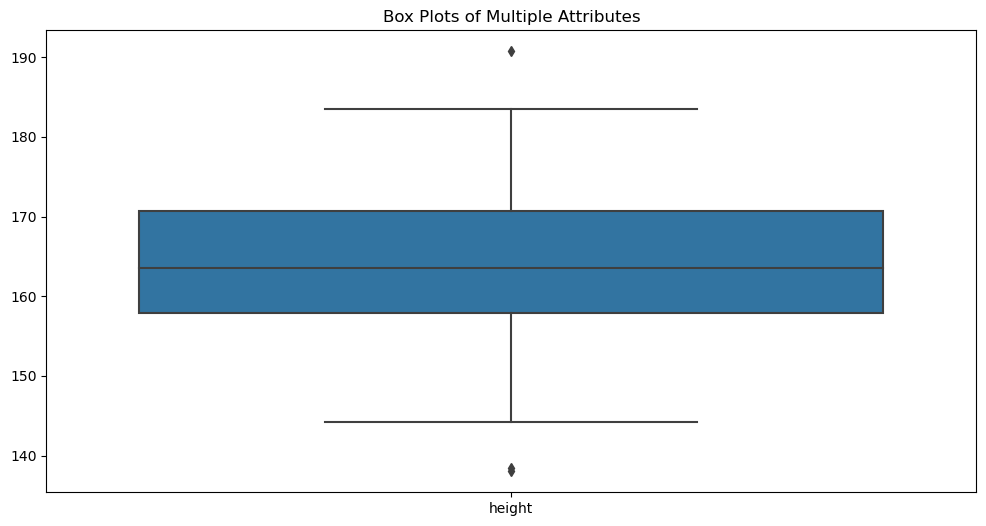

In [62]:
# Create box plots for multiple numerical columns using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['height']])
plt.title('Box Plots of Multiple Attributes')
plt.show()

In [63]:
import numpy as np
import pandas as pd
from scipy import stats
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset.xlsx", sheet_name="dataset")
# Assume we are focusing on the 'income' column, which may contain outliers
# Step 1: Calculate the Z-score for the 'income' column
z_scores = np.abs(stats.zscore(data['height'].dropna())) # Drop missing values for calculation
# Step 2: Set the threshold for Z-score (commonly 3 or -3)
threshold = 3
# Step 3: Identify the outliers
outliers = np.where(z_scores > threshold)
# Display the indices of outliers
print("Outliers detected at indices:", outliers)
# Step 4: Optionally, you can view the outliers
outlier_values = data['height'].iloc[outliers]
print("Outlier values:", outlier_values)

Outliers detected at indices: (array([], dtype=int64),)
Outlier values: Series([], Name: height, dtype: float64)


In [64]:
import numpy as np
import pandas as pd
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset.xlsx", sheet_name="dataset")
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'income' column
Q1 = data['height'].quantile(0.25)
Q3 = data['height'].quantile(0.75)
# Step 2: Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1
# Step 3: Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Step 4: Identify the outliers in the 'income' column
outliers = data['height'][(data['height'] < lower_bound) | (data['height'] > upper_bound)]
# Display the outliers in the 'income' column
print("Outliers in 'height' column:")
print(outliers)
# Step 5: Optionally, you can also display the lower and upper bounds for reference
print(f"\nLower bound: {lower_bound}, Upper bound: {upper_bound}")


Outliers in 'height' column:
14    138.031134
22    190.733598
36    138.490302
Name: height, dtype: float64

Lower bound: 138.724449752162, Upper bound: 189.840043489234


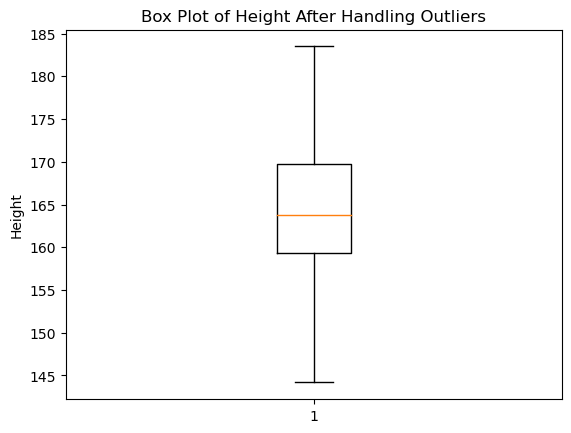

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset.xlsx", sheet_name="dataset")
# Assume we are focusing on the 'income' column, which may contain outliers
# Step 1: Detect Outliers using Box Plot Statistics (IQR method)
Q1 = data['height'].quantile(0.25)
Q3 = data['height'].quantile(0.75)
IQR = Q3 - Q1
# Calculate the bounds for outliers based on 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Step 2: Identify the outliers
outliers = (data['height'] < lower_bound) | (data['height'] > upper_bound)
# Step 3: Replace outliers with the mean
mean_value = data['height'].mean()
data.loc[outliers, 'height'] = mean_value
# Step 4: Plot the box plot after imputing outliers
plt.boxplot(data['height'].dropna())
plt.title('Box Plot of Height After Handling Outliers')
plt.ylabel('Height')
plt.show()

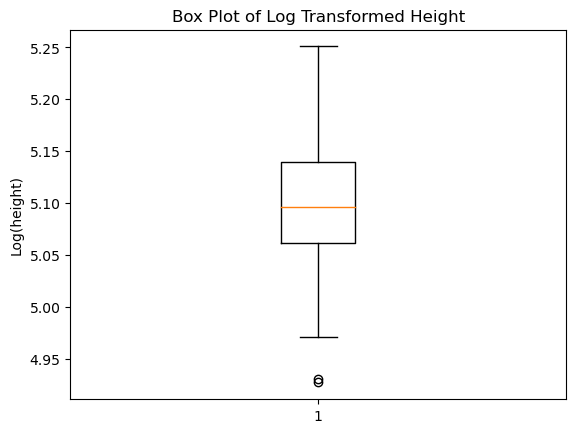

        height  height_log
0   163.419921    5.096323
1   160.731189    5.079733
2   154.878956    5.042644
3   148.451433    5.000258
4   173.231706    5.154630
..         ...         ...
95  168.475817    5.126792
96  159.602403    5.072686
97  157.216953    5.057627
98  166.958453    5.117745
99  155.216272    5.044819

[100 rows x 2 columns]


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset.xlsx", sheet_name="dataset")
# Assume we are focusing on the 'income' column, which may contain outliers
# Step 1: Apply log transformation to the 'income' column
# Ensure that all values are positive before applying log transformation
data['height_log'] = np.log(data['height'].clip(lower=1)) # clip to avoid log(0)
# Step 2: Plot the box plot of the transformed 'income_log' column
plt.boxplot(data['height_log'].dropna())
plt.title('Box Plot of Log Transformed Height')
plt.ylabel('Log(height)')
plt.show()
# Step 3: Display the updated dataset
print(data[['height', 'height_log']])

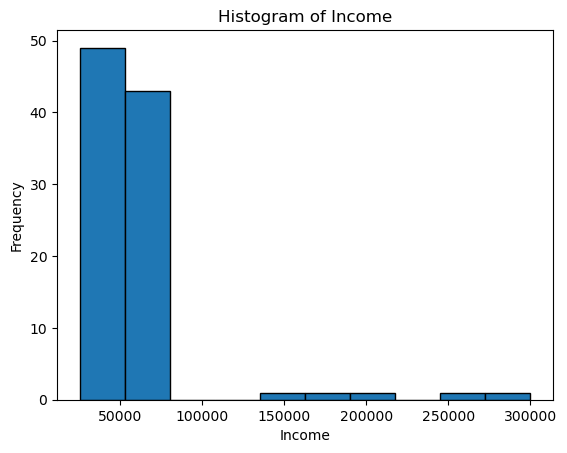

In [67]:
import matplotlib.pyplot as plt
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset.xlsx", sheet_name="dataset")
# Step 1: Construct a histogram for the 'income' column
plt.hist(data['income'].dropna(), bins=10, edgecolor='black') # Drop missing values to avoid issues
# Step 2: Add titles and labels
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
# Step 3: Show the plot
plt.show()

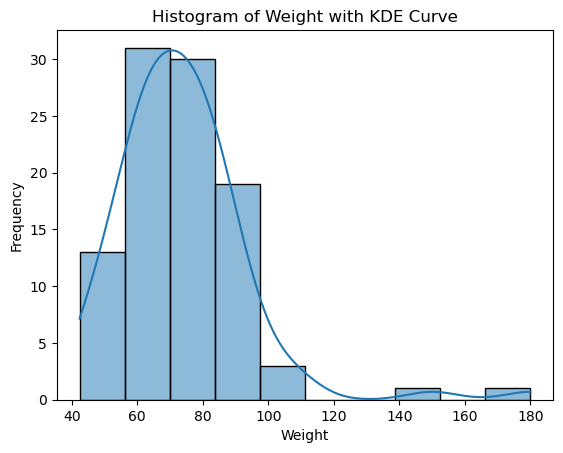

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset.xlsx", sheet_name="dataset")
# Step 1: Construct a histogram for the 'income' column with a KDE curve
sns.histplot(data['weight'].dropna(), bins=10, kde=True) # kde=True adds the KDE curve
# Step 2: Add titles and labels
plt.title('Histogram of Weight with KDE Curve')
plt.xlabel('Weight')
plt.ylabel('Frequency')
# Step 3: Show the plot
plt.show()

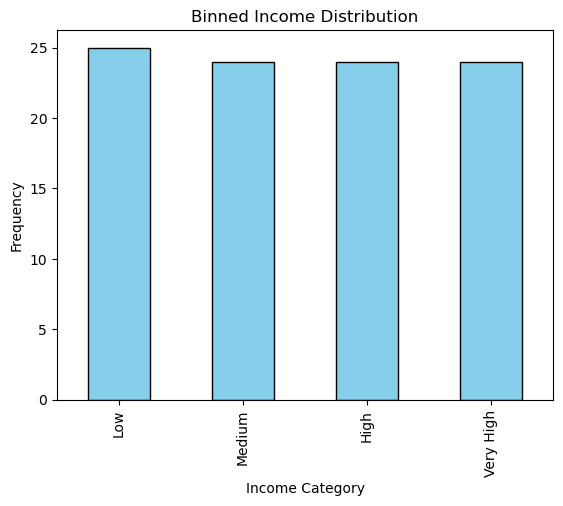

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset.xlsx", sheet_name="dataset")
# Bin the 'income' column into 4 categories using qcut
data['binned_income'] = pd.qcut(data['income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
# Plot the binned income categories in a bar plot
data['binned_income'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
# Add titles and labels
plt.title('Binned Income Distribution')
plt.xlabel('Income Category')
plt.ylabel('Frequency')
# Show the plot
plt.show()

In [70]:
data

,age,income,height,weight,score,gender,target_class,binned_income
0,53.314588,46154.444558,163.419921,76.123791,63,Female,Healthy,Medium
1,17.966176,60062.928092,160.731189,44.461246,79,Male,Healthy,Very High
2,34.444523,44231.081305,154.878956,85.437335,99,Male,Healthy,Low
3,38.840654,58356.921121,148.451433,77.088962,53,Male,Unhealthy,High
4,34.673053,38702.931453,173.231706,73.840446,67,Female,Unhealthy,Low
...,...,...,...,...,...,...,...,...
95,34.339202,150000.000000,168.475817,62.157100,67,Female,Healthy,Very High
96,22.889838,180000.000000,159.602403,63.697198,55,NaN,Unhealthy,Very High
97,28.481639,200000.000000,157.216953,65.773231,86,Female,Healthy,Very High
98,35.473987,250000.000000,166.958453,150.000000,97,Male,Healthy,Very High


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset.xlsx", sheet_name="dataset")

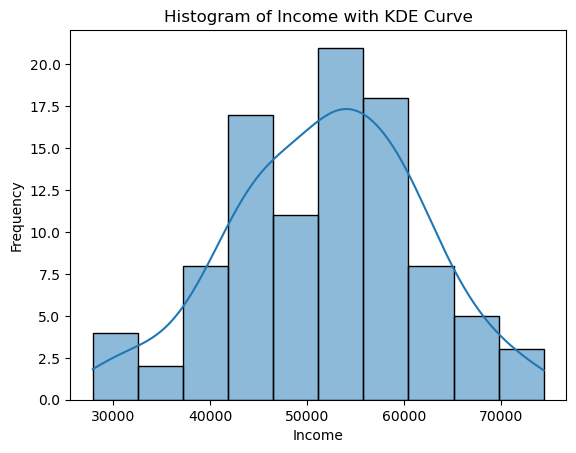

In [73]:
# Assume we are focusing on the 'income' column, which may contain outliers
# Step 1: Detect Outliers using Box Plot Statistics (IQR method)
Q1 = data['income'].quantile(0.25)
Q3 = data['income'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the bounds for outliers based on 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Identify the outliers
outliers = (data['income'] < lower_bound) | (data['income'] > upper_bound)
# Step 3: Replace outliers with the mean
mean_value = data['income'].mean()
data.loc[outliers, 'income'] = mean_value

# Step 5: Construct a histogram for the 'income' column with a KDE curve
sns.histplot(data['income'].dropna(), bins=10, kde=True) # kde=True adds the KDE curve

# Step 6: Add titles and labels
plt.title('Histogram of Income with KDE Curve')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Step 7: Show the plot
plt.show()

In [74]:
data.to_excel('cleaned_dataaaa123.xlsx', sheet_name='CleanedDataaaa', index=False)


# Linear & Logistic Regression 

In [148]:
data

,age,income,height,weight,score,gender,target_class,health_score
0,53.314588,46154.444558,163.419921,76.123791,63,Female,Healthy,4629.438777
1,17.966176,60062.928092,160.731189,44.461246,79,Male,Healthy,6034.251053
2,34.444523,44231.081305,154.878956,85.437335,99,Male,Healthy,4450.421382
3,38.840654,58356.921121,148.451433,77.088962,53,Male,Unhealthy,5842.949489
4,34.673053,38702.931453,173.231706,73.840446,67,Female,Unhealthy,3885.108317
...,...,...,...,...,...,...,...,...
94,18.384799,65295.503195,165.184339,93.693582,75,Female,Healthy,6540.780725
95,34.339202,59733.807283,168.475817,62.157100,67,Female,Healthy,5991.667519
97,28.481639,59733.807283,157.216953,65.773231,86,Female,Healthy,5999.496923
98,35.473987,59733.807283,166.958453,150.000000,97,Male,Healthy,5980.428127


In [149]:
#Check Correlation
data.corr()

,age,income,height,weight,score,health_score
age,1.000000,-0.163839,-0.112105,0.015348,-0.035839,-0.163506
income,-0.163839,1.000000,0.089925,0.138857,-0.100925,0.999949
height,-0.112105,0.089925,1.000000,-0.260690,0.126753,0.092701
weight,0.015348,0.138857,-0.260690,1.000000,0.039409,0.133015
score,-0.035839,-0.100925,0.126753,0.039409,1.000000,-0.093145
health_score,-0.163506,0.999949,0.092701,0.133015,-0.093145,1.000000


In [150]:
#Preparing for modeling

# Example formula for health score (this is arbitrary)
data['health_score'] = (data['score'] * 0.5 + data['income'] * 0.1 - data['weight'] * 0.3 + data['age'] * 0.1)
feature_cols = ['age','income'] # a lsit of the predictors
X = data[feature_cols] # subsetting our data to only the predictors
y = data['health_score'] # our response variable


In [159]:
#Split data and built the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import pandas as pd

# Impute missing values in X
imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)

# Impute missing values in y
imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=0)

# Initialize and train the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Print intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)


24.882851049414057
[0.03563474 0.09984714]


In [160]:
#Get the regression line detail

# Get the intercept and coefficients
intercept = linreg.intercept_
coefficients = linreg.coef_
# Get the feature names (assuming X is a DataFrame)
feature_names = X.columns
# Print the intercept
print(f"Intercept (c): {intercept}")
# Print the coefficients with their corresponding feature names
for coef, feature in zip(coefficients, feature_names):
 print(f"Coefficient for {feature} (m): {coef}")
# Construct the regression equation dynamically as a string
equation = f"{y.name} = " # Dynamically use the name of the target variable
# Add each term (coefficient * feature) to the equation
terms = []
for coef, feature in zip(coefficients, feature_names):
 term = f"({coef:.4f} * {feature})"
 terms.append(term)
# Join all terms with ' + ' and add the intercept
equation += " + ".join(terms)
equation += f" + ({intercept:.4f})"
# Display the regression equation
print("\nRegression Equation:")
print(equation)

Intercept (c): 24.882851049414057
Coefficient for age (m): 0.035634744138442385
Coefficient for income (m): 0.09984714238242573

Regression Equation:
health_score = (0.0356 * age) + (0.0998 * income) + (24.8829)


In [161]:
# Import required libraries
import numpy as np
import pandas as pd

# Evaluate the train model with test set
y_pred = linreg.predict(X_test)  # Predicting with the test set

# Convert y_test to a numpy array
y_test = np.array(list(y_test))

# Round predicted values to two decimal places
y_pred = np.round(y_pred, 2)

# Create a DataFrame to compare actual and predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

# Display the entire DataFrame
# pd.set_option('display.max_rows', df.shape[0]+1)
df


,Actual,Predicted
0,6152.075473,6160.89
1,6897.586410,6892.24
2,5348.616567,5351.33
3,5293.384047,5297.94
4,4604.794028,4610.96
5,4170.278757,4164.03
6,4450.421382,4442.46
7,3250.908512,3242.50
8,6704.292839,6691.54
9,5613.196822,5594.81


In [162]:
#Get the error rate prediction

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,
y_pred)))
print('R-squared:', linreg.score(X_test, y_test))

Mean Absolute Error: 7.291462849444408
Mean Squared Error: 77.14734640212498
Root Mean Squared Error: 8.783356215144925
R-squared: 0.9999155927860491


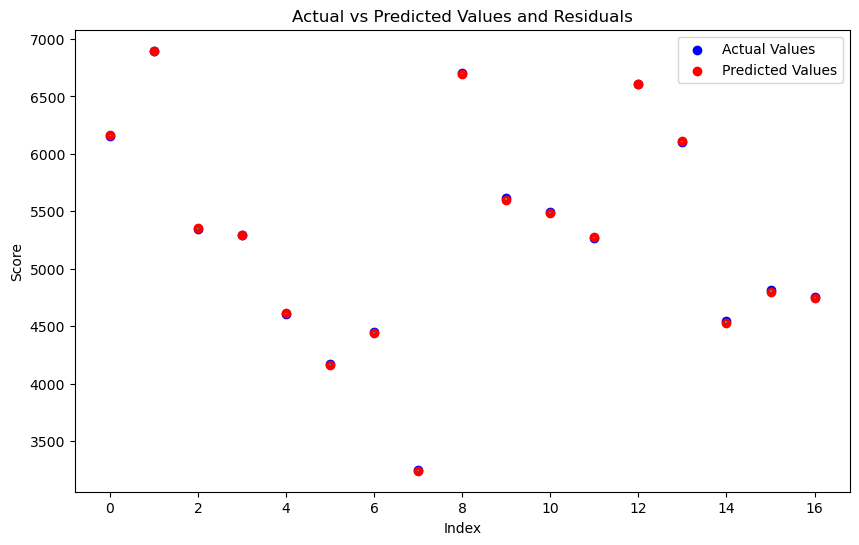

In [163]:
#Visualize - Actual vs Predicted Values and Residuals

# Create a DataFrame for the Actual and Predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.reset_index(drop=True, inplace=True)
# Calculate residuals (Actual - Predicted)
results_df['Residuals'] = results_df['Actual'] - results_df['Predicted']
# Plotting the results
plt.figure(figsize=(10, 6))
# Scatter plot for Actual vs Predicted values
plt.scatter(range(len(y_test)), results_df['Actual'], color='blue', label='Actual Values')
plt.scatter(range(len(y_test)), results_df['Predicted'], color='red', label='Predicted Values')
# Residuals plot
for i in range(len(results_df)):
 plt.plot([i, i], [results_df['Actual'][i], results_df['Predicted'][i]], color='gray', linestyle='--')
# Add labels and title
plt.xlabel('Index')
plt.ylabel('Score')
plt.title('Actual vs Predicted Values and Residuals')
plt.legend()
# Show the plot
plt.show()

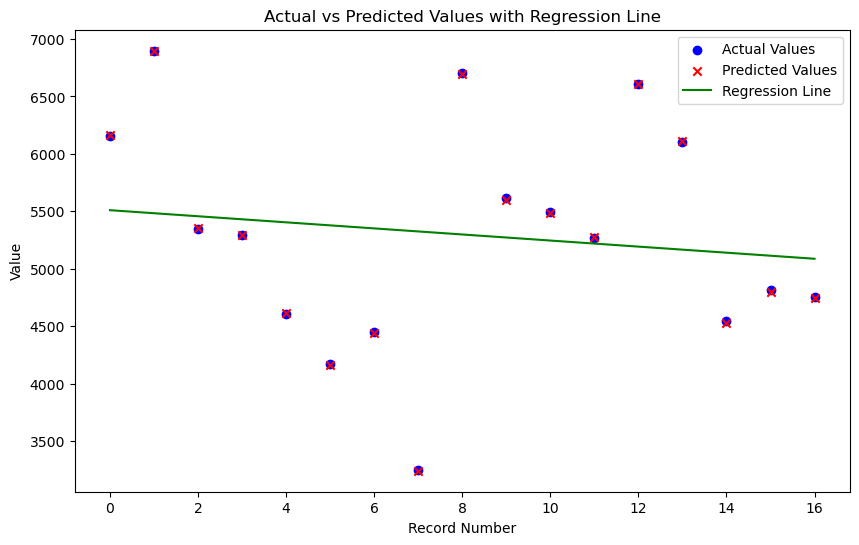

In [164]:
#Visualize - Actual vs Predicted Values and Residuals

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Assuming y_test and y_pred are already defined and available
# Create a scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
# Scatter plot of actual vs predicted
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values', marker='o')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values', marker='x')
# Fit a linear regression model to the actual vs predicted data for drawing the regression line
regressor = LinearRegression()
regressor.fit(np.array(range(len(y_test))).reshape(-1, 1), y_test)
# Generate predictions for drawing the regression line
regression_line = regressor.predict(np.array(range(len(y_test))).reshape(-1, 1))
# Plot the regression line
plt.plot(range(len(y_test)), regression_line, color='green', label='Regression Line')
# Add labels and title
plt.xlabel('Record Number')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values with Regression Line')
# Add a legend
plt.legend()
# Show the plot
plt.show()

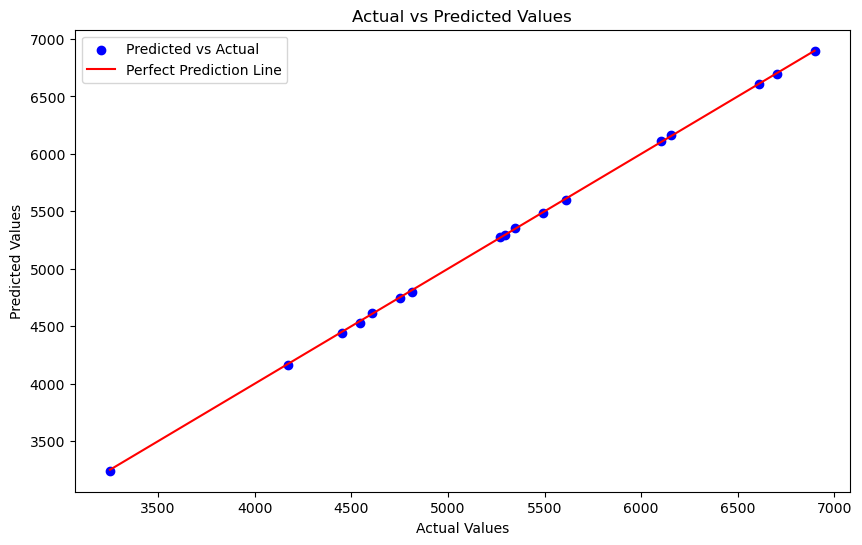

In [165]:
# Visualize - Actual vs Predicted Values

import matplotlib.pyplot as plt
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
# Add a line representing the perfect prediction (Actual = Predicted)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction Line')
# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
# Add a legend
plt.legend()
# Show the plot
plt.show()

In [166]:
#Test with unseen data

import numpy as np

# Function to take user input for the features and predict using the trained model
def predict_new_data():
    try:
        # Input age and income from the user
        age = float(input("Enter the age: "))
        income = float(input("Enter the income: "))

        # Create a numpy array with the new input data (reshaped for prediction)
        new_data = np.array([[age, income]])

        # Use the trained model to predict the target (score)
        predicted_score = linreg.predict(new_data)

        # Show the predicted score
        print(f"\nPredicted score for the entered data: {predicted_score[0]:.2f}")

    except ValueError:
        print("Invalid input. Please enter valid numbers for age and income.")

# Run the prediction function
predict_new_data()


Enter the age: 25
Enter the income: 5000

Predicted score for the entered data: 525.01


# Logistic regression

In [188]:
data

,age,income,height,weight,score,gender,target_class,health_score
0,53.314588,46154.444558,163.419921,76.123791,63,Female,Healthy,4629.438777
1,17.966176,60062.928092,160.731189,44.461246,79,Male,Healthy,6034.251053
2,34.444523,44231.081305,154.878956,85.437335,99,Male,Healthy,4450.421382
3,38.840654,58356.921121,148.451433,77.088962,53,Male,Unhealthy,5842.949489
4,34.673053,38702.931453,173.231706,73.840446,67,Female,Unhealthy,3885.108317
...,...,...,...,...,...,...,...,...
94,18.384799,65295.503195,165.184339,93.693582,75,Female,Healthy,6540.780725
95,34.339202,59733.807283,168.475817,62.157100,67,Female,Healthy,5991.667519
97,28.481639,59733.807283,157.216953,65.773231,86,Female,Healthy,5999.496923
98,35.473987,59733.807283,166.958453,150.000000,97,Male,Healthy,5980.428127


In [189]:
# Remove rows with missing values
data = data.dropna()

# Define feature columns and subset data
feature_cols = ['age', 'income', 'weight', 'height', 'score']  # List of predictors
X = data[feature_cols]  # Subsetting our data to only the predictors
y = data['target_class']  # Response variable


In [190]:

# Split data and train
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define feature columns and subset data
feature_cols = ['age', 'income', 'weight', 'height', 'score']  # List of predictors
X = data[feature_cols]  # Subsetting our data to only the predictors
y = data['target_class']  # Response variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

# Train the logistic regression model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

# Make predictions
predictions = logmodel.predict(X_test)

# Calculate and print the accuracy score
accuracy = logmodel.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")


Model accuracy: 0.60


C:\Users\khali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [191]:
#Confusion Matrix & Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
##Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

              precision    recall  f1-score   support

     Healthy       0.57      0.66      0.61        32
   Unhealthy       0.63      0.54      0.58        35

    accuracy                           0.60        67
   macro avg       0.60      0.60      0.60        67
weighted avg       0.60      0.60      0.60        67



array([[21, 11],
       [16, 19]], dtype=int64)

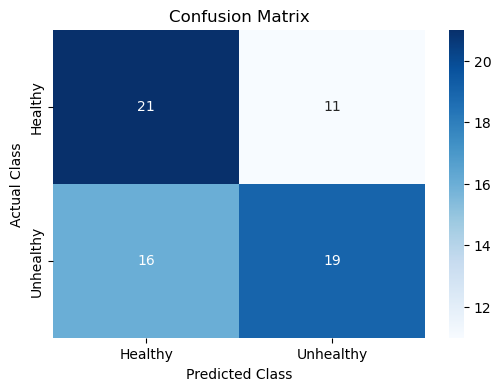

In [192]:
#Heat Map for Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'y_test' contains the actual labels and 'predictions' contains the predicted labels
conf_matrix = confusion_matrix(y_test, predictions)
# Define the labels for the confusion matrix
class_names = ['Healthy', 'Unhealthy']
# Create a heatmap for the confusion matrix with target class names
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

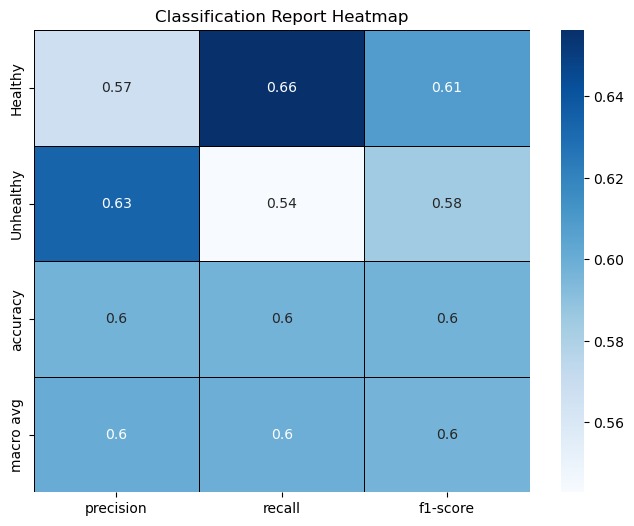

In [193]:
#Heat Map for classification report

from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Generate classification report as a dictionary
report = classification_report(y_test, predictions, target_names=['Healthy',
'Unhealthy'], output_dict=True)
# Convert the report to a DataFrame
df_report = pd.DataFrame(report).transpose()
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Blues", linewidths=0.5,
linecolor='black')
plt.title('Classification Report Heatmap')
plt.show()